Exploring the Netflix Titles Dataset

Author: Miftaj Chowdhury 

In this project, I am exploring the Netflix Titles dataset from Kaggle.
The goal is to practice basic data analysis with Python and Pandas by answering:

How many Movies vs TV Shows are on Netflix in this dataset?
What are the most common genres?
Which are the top 5 countries producing content?
I use Python, Pandas, Matplotlib, and Seaborn to clean, analyze, and visualize the data.

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style="whitegrid")

# Loading dataset
df = pd.read_csv("netflix_titles.csv")

# Looking at the first few rows
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [35]:
print("Shape of dataset (rows, columns):", df.shape)
print("\nColumn names:\n", df.columns.tolist())

print("\nInfo:")
df.info()

print("\nMissing values per column:")
print(df.isna().sum())

Shape of dataset (rows, columns): (8807, 12)

Column names:
 ['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB

Missing values per column:
show_id         

## Data Overview

- The dataset has X rows and Y columns.  
- Some columns like `director`, 'cast' and `country` have missing values.  
- The main columns I will use are:
  - `type` (Movie or TV Show) answers - How many movies vs TV shows?
  - `listed_in` (genres) answers - Most common genres?
  - `country` (country/countries of production) answers - Top 5 countries producing content?

In [36]:
# Filling the missing countries with 'Unknown'
df['country'] = df['country'].fillna("Unknown")

# Remove rows where 'country' is missing
df = df.dropna(subset=["country"])

# Filling the missing director with 'Unknown'
df['director'] = df['director'].fillna("Unknown")

# Finding the total number of genres
df['listed_in'].isna().sum()

0

## 3. Movies vs TV Shows

Here I am counting how many entries are labeled as Movie and how many as TV Show.

In [37]:
type_counts = df['type'].value_counts()
type_counts

Movie      6131
TV Show    2676
Name: type, dtype: int64

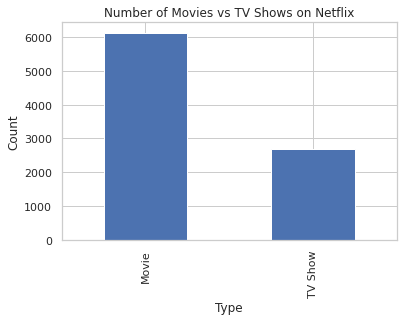

In [38]:
plt.figure(figsize=(6, 4))
type_counts.plot(kind='bar')
plt.title("Number of Movies vs TV Shows on Netflix")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

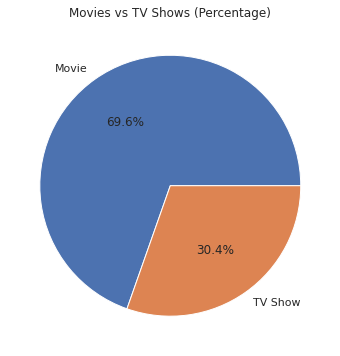

In [39]:
plt.figure(figsize=(6,6))
plt.pie(
    type_counts.values,
    labels=type_counts.index,
    autopct='%1.1f%%'
)
plt.title("Movies vs TV Shows (Percentage)")
plt.show()

The table bar and pie chart show that Netflix has more Movies than TV Shows.

In [40]:
# Drop missing genre entries
genres_series = df["listed_in"].dropna()

# Split each string into a list of genres
genres_split = genres_series.str.split(", ")

# Turn each list element into its own row
all_genres = genres_split.explode()

# Count occurrences of each genre
genre_counts = all_genres.value_counts()
genre_counts.head(20)

International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1351
Documentaries                869
Action & Adventure           859
TV Dramas                    763
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
TV Comedies                  581
Thrillers                    577
Crime TV Shows               470
Kids' TV                     451
Docuseries                   395
Music & Musicals             375
Romantic TV Shows            370
Horror Movies                357
Stand-Up Comedy              343
Reality TV                   255
Name: listed_in, dtype: int64

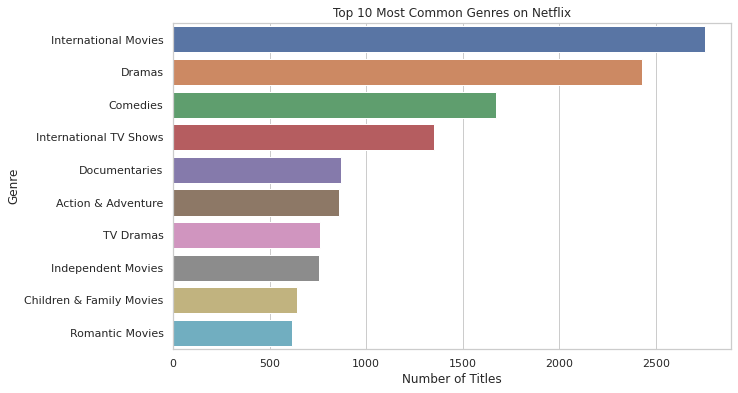

In [41]:
top_genres = genre_counts.head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_genres.values, y=top_genres.index)
plt.title("Top 10 Most Common Genres on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.show()

## Most Common Genres

The bar chart shows the top 10 most common genres on Netflix in this dataset.  
The most frequent genres include categories like International Movies, Dramas, and Comedies.  

This suggests Netflix focuses heavily on these types of content, possibly because they attract a large audience globally.

In [42]:
# Drop missing country values
countries_series = df["country"].dropna()

# Filling the missing cast with 'Unknown'
df['cast'] = df['cast'].fillna("Unknown")

# Split by comma and space
countries_split = countries_series.str.split(", ")

# Explode into individual countries
all_countries = countries_split.explode()

# Count occurrences
country_counts = all_countries.value_counts()
country_counts.head(20)

United States     3689
India             1046
Unknown            831
United Kingdom     804
Canada             445
France             393
Japan              318
Spain              232
South Korea        231
Germany            226
Mexico             169
China              162
Australia          160
Egypt              117
Turkey             113
Hong Kong          105
Nigeria            103
Italy              100
Brazil              97
Argentina           91
Name: country, dtype: int64

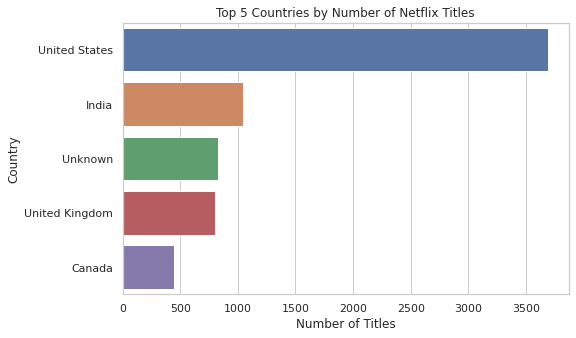

In [43]:
top_countries = country_counts.head(5)

plt.figure(figsize=(8,5))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title("Top 5 Countries by Number of Netflix Titles")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()

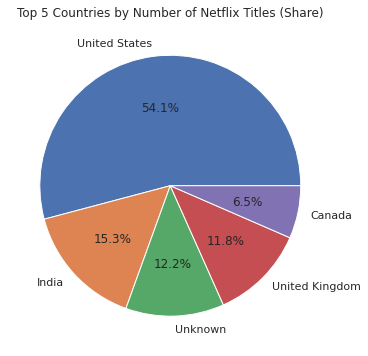

In [44]:
plt.figure(figsize=(6,6))
plt.pie(
    top_countries.values,
    labels=top_countries.index,
    autopct='%1.1f%%'
)
plt.title("Top 5 Countries by Number of Netflix Titles (Share)")
plt.show()

## Top 5 Countries Producing Content

The top five countries by number of titles are United States, India, Unknown, United Kingdom, and Canada.  
The United States is usually the leader, followed by other major content producers such as [e.g., India, United Kingdom, Canada].

This shows that while Netflix is available in many countries, a large portion of its content comes from a few key producers.

## Conclusions

In this data analysis project, I explored the Netflix Titles dataset using Python, Pandas, and Seaborn.

- Movies vs TV Shows:  
  Movies make up about 69.6% of the catalog in this dataset, while TV Shows account for 30.4%. This indicates that movies still dominate Netflix's content library.

- **Genres:**  
  The most common genres were International Movies, Dramas, Comedies, International TV Shows, Documentaries, Action & Adventure, TV Dramas, Independent Movies, Children & Family Movies, Romantic Movies. 
  This suggests Netflix invests heavily in International Movies, Dramas, Comedie, which may reflect audience demand.

- **Countries:**  
  The top content-producing countries were United States, India, Uk and Canada. The United States has the most titles, but there is also strong representation from other countries like India, UK and Canada showing Netflix's global reach.

Through this project, I practiced:
- Loading data from a CSV file with Pandas
- Cleaning and transforming text columns (splitting and exploding)
- Counting and summarizing data
- Visualizing results with bar charts and pie charts
